# Continuous Probabilistic Methods Exercises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

## 1. Using lemonade.csv dataset and focusing on continuous variables

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


### > Set the Date columns to be a datatime type and index

In [6]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [7]:
df['month'] = df.index.month_name()

In [21]:
df.shape

(365, 7)

In [8]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


### > Exploring lemonade dataset

- Visualize the continuous variables
- Similar to vizualizing Anscombe's Quartet
We're looking for patterns and a picture is worth 1000 words.
By plotting values, we see more of the picture than .describe can show on its own

**<span style="background-color: #FFFF00">Temperature</span>**

Text(0, 0.5, 'Degrees Fahrenheit')

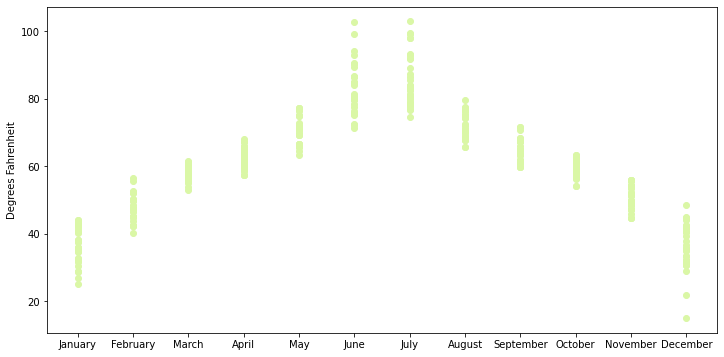

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(df.month, df.Temperature, c=['#DAF7A6'])
plt.ylabel("Degrees Fahrenheit")

In [23]:
df.Temperature.describe()

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: Temperature, dtype: float64

In [24]:
# Let's look at the highest temperature days
df[df.Temperature > 100]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-06-26,Monday,102.6,0.47,60,0.5,42,June
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July


**NOTE: 2017-02-11 temperature is above 200**

In [25]:
# Let's take a look at the days nearby.
df.loc["2017-02-09":"2017-02-13"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


#### > How to handle outlier Feb 11th?
- This outlier is so funky/unreal, it might as well be a null
- If we drop the entire row, then we have an entire row of nulls
- We could replace this day's temperature with the day before, the day after, or average the week.

In [26]:
# Let's assign the temperature for this day to be the same temperature as yesterday
df.loc[df.Temperature == 212, "Temperature"] = df.loc["2017-02-10"].Temperature

In [27]:
# Ensure that the outlier was replaced with the previous day's temperature
df.loc["2017-02-09":"2017-02-11"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,50.0,0.91,35,0.5,21,February


***

**<span style="background-color: #FFFF00">Flyers</span>**

Text(0, 0.5, 'Number of Flyers')

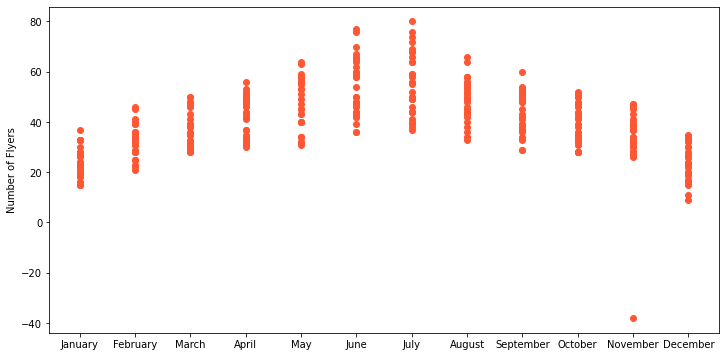

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(df.month, df.Flyers, c=['#FF5733'])
plt.ylabel("Number of Flyers")

**NOTE: We see an abnormal point at November**

In [32]:
df.Flyers.describe()

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

In [33]:
# What is the index of that negative Flyer value?
df.Flyers.idxmin()

Timestamp('2017-11-21 00:00:00')

In [34]:
# Negative flyers don't make sense. Let's look at what's going on near that observation
df.loc["2017-11-19":"2017-11-23"]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


In [35]:
# It looks like this negative flyer value is a simple typo
# And since the business isn't giving out a negative amount of promotional flyers, then we can take the absolute value
df.Flyers = df.Flyers.abs()
df.loc["2017-11-21"].Flyers

38

***

**<span style="background-color: #FFFF00">Rainfall</span>**

Text(0, 0.5, 'Rainfall')

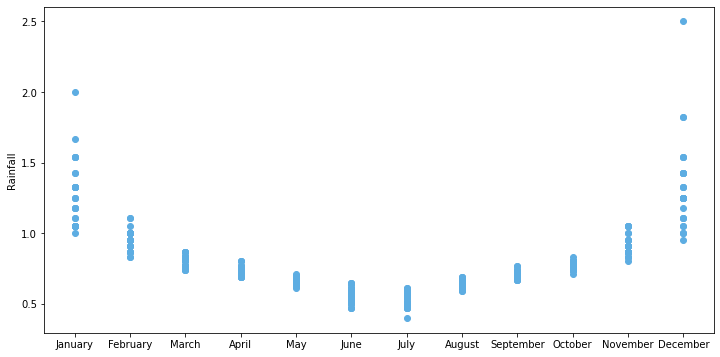

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(df.month, df.Rainfall, c=['#5DADE2'])
plt.ylabel("Rainfall")

**It seems like there are many rainy days at this location but no extreme anomalies found**

***

**<span style="background-color: #FFFF00">Sales</span>**

Text(0, 0.5, 'Amount of Sales')

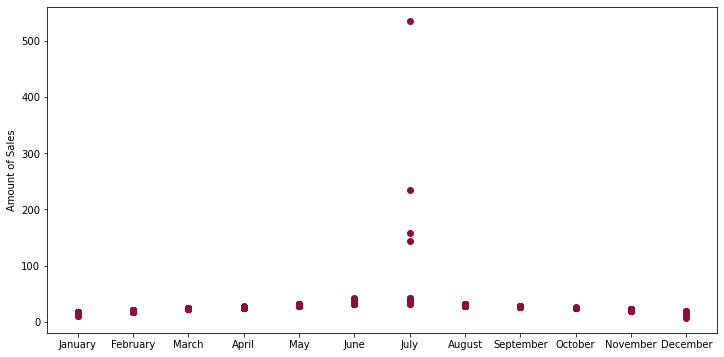

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(df.month, df.Sales, c=['#900C3F'])
plt.ylabel("Amount of Sales")

**NOTE: a couple points that are away from normal pattern**

In [43]:
# Let's look at the rows with high sales a little more closely
df[df.Sales > 50]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


#### > Should we keep the Sales outliers?
- If we're running this business in Texas and we're looking to franchise in New Mexico, should we keep the Sales outliers as part of our sales predictions?
- If we're running this biz in Texas and looking to franchise in New Zealand, should we keep the ouliers or ignore them in the predicted sales analysis?


### a. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

### b. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [44]:
def get_lower_and_upper_bounds(series, k=1.5):
    '''
    This function takes in two arguments:
    The first argument is a pandas Series.
    The second argument is the multiplier, which have a default argument of 1.5.
    '''
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return lower_bound, upper_bound

In [45]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 17.30000000000001
 Upper bound for Temperature: 103.69999999999999

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [46]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [47]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7,December


In [48]:
outliers['Rainfall']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-06,Friday,25.3,1.54,23,0.5,11,January
2017-01-07,Saturday,32.9,1.54,19,0.5,13,January
2017-01-11,Wednesday,32.6,1.54,23,0.5,12,January
2017-01-12,Thursday,38.2,1.33,16,0.5,14,January
2017-01-13,Friday,37.5,1.33,19,0.5,15,January
2017-01-16,Monday,30.6,1.67,24,0.5,12,January


In [49]:
outliers['Flyers']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41,June
2017-07-14,Friday,92.0,0.50,80,0.5,40,July


In [50]:
outliers['Sales']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


In [51]:
outliers['Price']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


**NOTE: The rainfall outliers don't make snese since they're days without rain, other outliers should be kept**

### c. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

### d. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [52]:
# at a multiplier of 3:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], k=3)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -15.09999999999998
 Upper bound for Temperature: 136.09999999999997

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


In [53]:
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [55]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


In [56]:
outliers['Rainfall']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [57]:
outliers['Flyers']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


In [58]:
outliers['Price']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


In [59]:
outliers['Sales']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July


**NOTE: The negative bonds don't make sense. Agian, the outliers for rainfall should be kept. And the sales' outliers should be kept**

## 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

**<span style="background-color: #FFFF00">Temperature</span>**

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Temperature Distribution'}, ylabel='Density'>

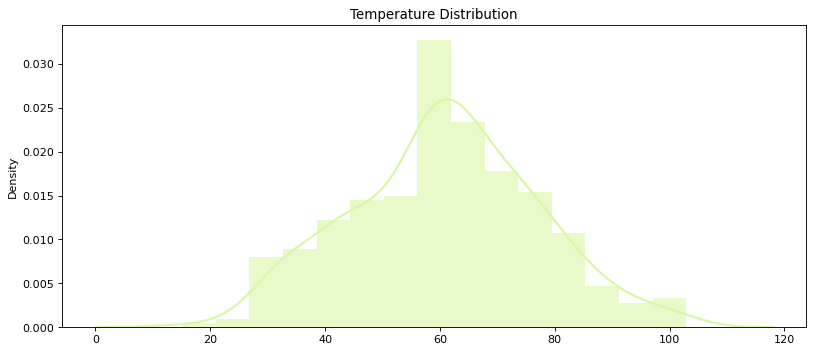

In [71]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(12,5), dpi= 80)
plt.title('Temperature Distribution')
sns.distplot(x=df['Temperature'], **kwargs, color = '#DAF7A6')

**<span style="background-color: #FFFF00">Rainfall</span>**

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Rainfall Distribution'}, ylabel='Density'>

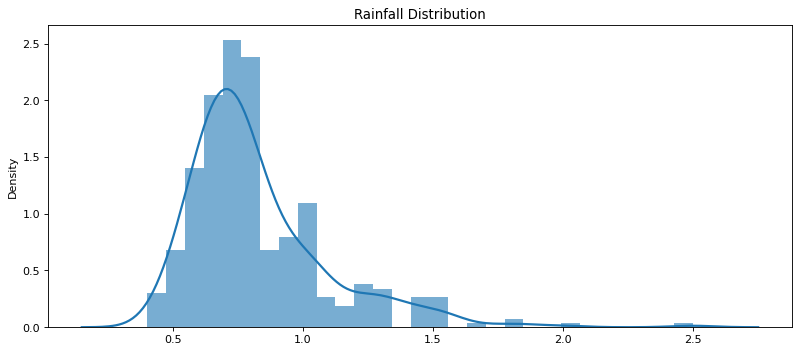

In [70]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(12,5), dpi= 80)
plt.title('Rainfall Distribution')
sns.distplot(x=df['Rainfall'], **kwargs)

**<span style="background-color: #FFFF00">Sales</span>**

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Rainfall Distribution'}, ylabel='Density'>

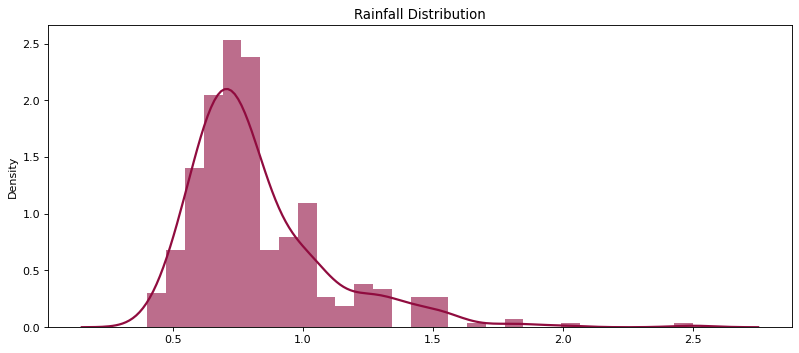

In [73]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(12,5), dpi= 80)
plt.title('Rainfall Distribution')
sns.distplot(x=df['Rainfall'], **kwargs, color = '#900C3F')

## Use a 2 sigma decision rule to isolate the outliers.



<span style="background-color: #FFFF00">99.7% of observations are within 3 standard deviations of the mean.</span>

In [86]:
mean = df.Temperature.mean()

In [87]:
std = df.Temperature.std()

In [88]:
upper_bound = mean + 3*std
lower_bound = mean - 3*std

In [89]:
upper_bound, lower_bound

(109.59832102599778, 11.963322809618745)

In [90]:
df.Temperature.describe()

count    365.000000
mean      60.780822
std       16.272500
min       15.100000
25%       49.700000
50%       61.100000
75%       71.300000
max      102.900000
Name: Temperature, dtype: float64

In [82]:
df[df.Temperature > upper_bound]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


In [83]:
df[df.Temperature < lower_bound]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,


###  Do these make sense?

**No, the 3 signa rule set the outliers 

#### - Should certain outliers be kept or removed?

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv